# Le graphique QQ : évalue tes régressions linéaires en un coup d'œil

[Lien du post MonShotData](https://www.monshotdata.com/p/graphique-qq-evaluer-regressions-lineaires)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
def feature_func(x):
    return x**5

In [3]:
# Générer des données
points = 150
x = np.linspace(0, 5, points)
y = feature_func(x) + np.random.normal(0, 100, points)

In [4]:
# Régression linéaire simple (1ère colonne, 1ère ligne)
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# QQ plot (1ère colonne, 2ème ligne)
residuals = y - y_pred

In [5]:
# Régression linéaire avec feature (2ème colonne, 1ère ligne)
X_feature = sm.add_constant(feature_func(x))
model_feature = sm.OLS(y, X_feature).fit()
y_pred_feature = model_feature.predict(X_feature)

# QQ Plot (2ème colonne, 2ème ligne)
residuals_feature = y - y_pred_feature

In [6]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

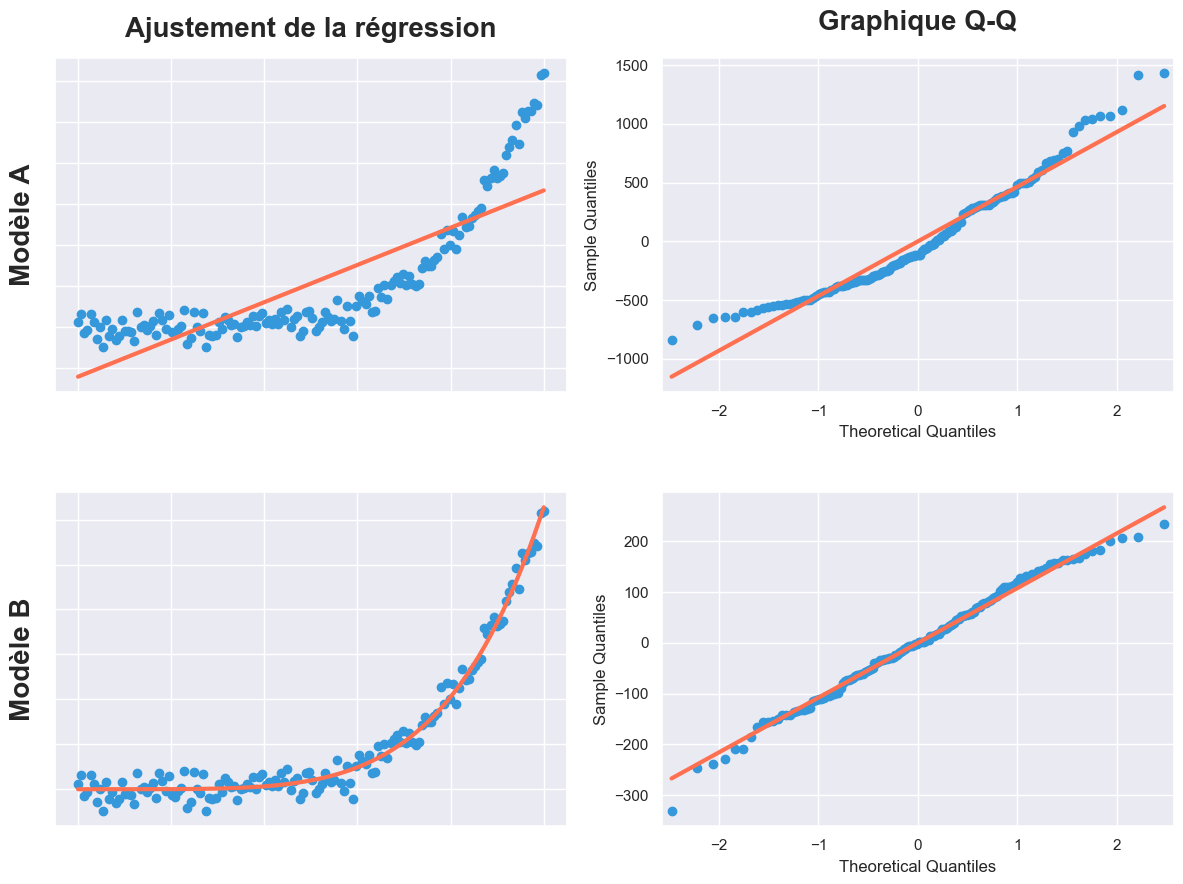

In [7]:
# Plotting
fig, axs = plt.subplots(2,2, figsize=(12, 9))

# 1ère colonne, 1ère ligne : régression linéaire simple
axs[0, 0].scatter(x, y  , color=colors[2])
axs[0, 0].plot(x, y_pred, color=colors[12], lw=3 )
axs[0, 0].set_title('Ajustement de la régression', fontsize = 20, fontweight = "bold", pad = 15)
axs[0, 0].set_xticklabels([])
axs[0, 0].set_yticklabels([])
axs[0, 0].set_ylabel("Modèle A",fontsize = 20, fontweight = "bold")

# 1ère colonne, 2ème ligne : QQ Plot
sm.qqplot(residuals, line='s', ax=axs[0, 1])
axs[0, 1].set_title('Graphique Q-Q', fontsize = 20, fontweight = "bold", pad = 20)
axs[0, 1].get_lines()[1].set_color(colors[12])
axs[0, 1].get_lines()[0].set_markerfacecolor(colors[2]) 
axs[0, 1].get_lines()[1].set_linewidth(3)
axs[0, 1].get_lines()[0].set_markeredgecolor(colors[2]) 

# 2ème colonne, 1ère ligne : régression linéaire avec feature
axs[1, 0].scatter(x, y, color=colors[2])
axs[1, 0].plot(x, y_pred_feature, color=colors[12], lw=3)
axs[1, 0].set_xticklabels([])
axs[1, 0].set_yticklabels([])
axs[1, 0].set_ylabel("Modèle B",fontsize = 20, fontweight = "bold")


# 2ème colonne, 2ème ligne : QQ Plot
sm.qqplot(residuals_feature, line='s', ax=axs[1, 1])
axs[1, 1].get_lines()[1].set_color(colors[12])
axs[1, 1].get_lines()[0].set_markerfacecolor(colors[2]) 
axs[1, 1].get_lines()[1].set_linewidth(3)
axs[1, 1].get_lines()[0].set_markeredgecolor(colors[2]) 

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()